<a href="https://colab.research.google.com/github/Pavan-P-N/Machine-Learning-Internship/blob/main/M_L_Minor_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<BarContainer object of 2 artists>

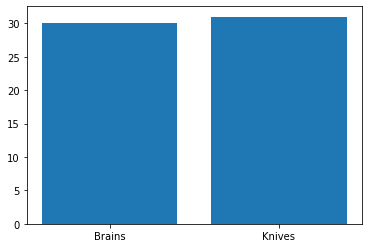

In [59]:
#Preprocessing of Data
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images= []
flat = []
DATADIR = '/content/drive/MyDrive/Data'
categories = ['Brains','Knives']

for category in categories:
  classnum = categories.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
      imgarr = imread(os.path.join(path,img))
      imgre = resize(imgarr,(150,150,3))
      flat.append(imgre.flatten())
      images.append(imgre)
      target.append(classnum)
flat = np.array(flat)
target = np.array(target)
images = np.array(images)

unique,count = np.unique(target,return_counts=True)
plt.bar(categories,count)

In [5]:
len(flat[0])

67500

In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat,target,test_size=0.3,random_state=109)


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
          {'C':[1,10,100,1000],'kernel':['linear']},
          {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [10]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [11]:
from sklearn.metrics import  accuracy_score,confusion_matrix

In [12]:
accuracy_score(y_pred,y_test)

1.0

In [13]:
confusion_matrix(y_pred,y_test)

array([[11,  0],
       [ 0,  8]])

In [14]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [15]:
model = pickle.load(open('img_model.p','rb'))

Enter Your URL https://upload.wikimedia.org/wikipedia/commons/5/58/Santoku_knife.jpg
(802, 1072, 3)
PREDICTED OUTPUT: Knives


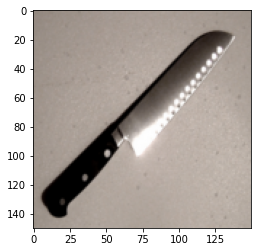

In [57]:
flat = []
url = input('Enter Your URL ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat.append(img_resized.flatten())
flat = np.array(flat)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat)
y_out = categories[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')